<div class="alert alert-info"></div>

# Исследование объявлений о продаже квартир

Сервисом Яндекс.Недвижимость предоставленны данные о продаже квартир в Санкт-Петербурге и ближайших к нему населенных пунктов за несколько лет. Необходимо научиться определять рыночную стоимость недвижимости. Задача - установить необходимые параметры, которые позволят построить систему способную отследить аномалии и мошейническую деятельность.

Для каждого наблюдения доступны два вида данных: первый внесен пользователем, второй - получен на основе картографических данных автоматически (растояние до центр, аэропорта, парков или водоемов).

# Study of ads for the sale of apartments

The Yandex.Real Estate service provides data on the sale of apartments in St. Petersburg and the nearest settlements for several years. You need to learn how to determine the market value of real estate. The task is to establish the necessary parameters that will allow building a system capable of tracking anomalies and fraudulent activity.

For each observation, two types of data are available: the first is entered by the user, the second is obtained automatically from cartographic data (distance to the center, airport, parks or water bodies).

### <div class="alert alert-info">Список переменных:</div>
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### <div class="alert alert-info">Variable list:</div>
- airports_nearest - distance to the nearest airport in meters (m)
- balcony — number of balconies
- ceiling_height - ceiling height (m)
- cityCenters_nearest - distance to the city center (m)
- days_exposition - how many days the ad was placed (from publication to removal)
- first_day_exposition — publication date
- floor - floor
- floors_total - total floors in the building
- is_apartment - apartments (boolean type)
- kitchen_area - kitchen area in square meters (m²)
- last_price - price at the time of removal from publication
- living_area - living area in square meters (m²)
- locality_name - name of the locality
- open_plan - free layout (boolean type)
- parks_around3000 - number of parks within a 3 km radius
- parks_nearest - distance to the nearest park (m)
- ponds_around3000 - number of ponds within a radius of 3 km
- ponds_nearest — distance to the nearest body of water (m)
- rooms - number of rooms
- studio - studio apartment (boolean type)
- total_area - area of ​​the apartment in square meters (m²)
- total_images - the number of photos of the apartment in the ad

<div class="alert alert-info">План исследования.</div>

- [Шаг 1. Знакомство с данными.](#Step_1)
- [Шаг 2. Предобработка данных.](#Step_2)
- [Шаг 3. Дополнение данных.](#Step_3)
- [Шаг 4. Исследовательский анализ данных.](#Step_4) <br />
[Пункт A. Изучиние параметров: площадь, цена, число комнат, высота потолков.](#Step_5) <br />
[Пункт B. Изучение времени продажи квартиры.](#Step_6) <br />
[Пункт C. Изучение зависимости цены от параметров.](#Step_7) <br />
[Пункт D. Ранжирование населенных пунктов.](#Step_8) <br />
[Пункт E. Поиск области центра.](#Step_9) <br />
[Пункт F. Изучение параметров квартир расположенных в центре.](#Step_10) <br />
- [Шаг 5. Вывод.](#Step_11)



- [Step 1. Getting to know the data.](#Step_1)
- [Step 2. Data preprocessing.](#Step_2)
- [Step 3. Add data.](#Step_3)
- [Step 4. Exploratory data analysis.](#Step_4) <br />
[Point A. Study parameters: area, price, number of rooms, ceiling height.](#Step_5) <br />
[Point B. Studying the time of sale of the apartment.](#Step_6) <br />
[Point C. Studying the dependence of price on parameters.](#Step_7) <br />
[Point D. Ranking of settlements.](#Step_8) <br />
[Point E. Search for the center area.](#Step_9) <br />
[Point F. Studying the parameters of apartments located in the center.](#Step_10) <br />
- [Step 5. Conclusion.](#Step_11)

<a id='Step_1'></a>
### Шаг 1. Изучение общей информации. 

### Step 1. Studying the general information.

In [1]:
# Загрузим пандас, откроем файли взлянем на первые пять строк.
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
# Получим общую информацию о данных.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Столбцы с пропусками:
- ceiling_height - слишком много пропущенных значений, потолки как правило имеют стандарты - заполним медианами.
- floors_total - предположим, что квартира продается на последнем этеже - заполним значениями floor.
- living_area - мало пропущенных объектов; заполнение чем-либо вряд чем то поможет - удалим.
- is_apartment - судя по всему в этом столбце Nan подразумевает жилой фонд - заполним нулями.
- kitchen_area - мало пропущенных объектов; заполнение чем-либо вряд чем то поможет - удалим.
- balcony - слишком много пропущенных значений - заполним нулями (исходя из предположения, что пользователь не указал количество балконов просто потому что их нет).               
- locality_name - мало пропущенных объектов; угадать город не получится - удалим. 
- airports_nearest - слишком много пропущенных значений - заполним средним по каждому населенногому пункту.      
- cityCenters_nearest - слишком много пропущенных значений - заполним средним по каждому населенногому пункту.  
- parks_around3000 - слишком много пропущенных значений - заполним нулями (учитывая, что данные полученны автоматически, можно предоположить, что пропущенные значения обусловлены отсутсвием парков в указаном радиусе).  
- parks_nearest - слишком много пропущенных значений - заполним нулями (исходя из того что рядом нет парков).           
- ponds_around3000 - слишком много пропущенных значений - заполним нулями (учитывая, что данные полученны автоматически, можно предоположить, что пропущенные значения обусловлены отсутсвием водоемов в указаном радиусе).  
- ponds_nearest - слишком много пропущенных значений - заполним нулями (исходя из того что рядом нет водоёмов).   
- days_exposition - наверно сняли объявления в тот же день - оставим как есть.

Columns with gaps:
- ceiling_height - too many missing values, ceilings usually have standards - fill in with medians.
- floors_total - suppose that the apartment is for sale on the last floor - fill in the floor values.
- living_area - few missed objects; filling with something is unlikely to help - delete it.
- is_apartment - apparently in this column Nan means housing stock - fill in with zeros.
- kitchen_area - few missed objects; filling with something is unlikely to help - delete it.
- balcony - too many missing values ​​- fill in with zeros (based on the assumption that the user did not specify the number of balconies simply because there are none).
- locality_name - few missed objects; guess the city will not work - delete.
- airports_nearest - too many missing values ​​- fill in the average for each locality.
- cityCenters_nearest - too many missing values ​​- fill in the average for each city.
- parks_around3000 - too many missing values ​​- fill in with zeros (considering that the data was obtained automatically, we can assume that the missing values ​​are due to the lack of parks in the specified radius).
- parks_nearest - too many missing values ​​- fill in with zeros (based on the fact that there are no parks nearby).
- ponds_around3000 - too many missing values ​​- fill in with zeros (considering that the data was obtained automatically, we can assume that the missing values ​​are due to the lack of water bodies in the specified radius).
- ponds_nearest - too many missing values ​​- fill in with zeros (based on the fact that there are no water bodies nearby).
- days_exposition - probably removed ads on the same day - let's leave it as it is.

Неподходящие форматы:
- last_price - значения довольны большие (знаки после запятой неважны) - будет удобнее работать с int64.
- first_day_exposition - содержат значения даты - приведём к типу - datetime64.
- floors_total - дробное значение этажа невозможно - приведем к int64.
- is_apartment - неподходящий тип - приведем к bool.
- balcony - число балконов не может быть дробным - приведем к int64.
- locality_name - строковые объекты могут помешать в поиске дубликатов - привидем к нижнему регистру.
- airports_nearest - значения довольны большие (знаки после запятой неважны) - будет удобнее работать с int64.
- cityCenters_nearest - значения довольны большие (знакми после запятой неважны) - будет удобнее работать с int64.
- parks_around3000 - число парков не может быть дробным - приведем к int64.
- parks_nearest - значения довольны большие (знаки после запятой неважны) - будет удобнее работать с int64.
- ponds_around3000 - число водоемов не может быть дробным - приведем к int64.
- ponds_nearest - значения довольны большие (знаки после запятой неважны) - будет удобнее работать с int64.
- days_exposition - так как оставляем пропуски к int64 привести не получится..

Unsuitable formats:
- last_price - the values ​​are quite large (the decimal places are not important) - it will be more convenient to work with int64.
- first_day_exposition - contain date values ​​- cast to datetime64 type.
- floors_total - fractional floor value is impossible - let's convert to int64.
- is_apartment - inappropriate type - cast to bool.
- balcony - the number of balconies cannot be fractional - cast to int64.
- locality_name - string objects can interfere with the search for duplicates - cast to lower case.
- airports_nearest - the values ​​are quite large (the decimal places are not important) - it will be more convenient to work with int64.
- cityCenters_nearest - the values ​​are quite large (the decimal places are not important) - it will be more convenient to work with int64.
- parks_around3000 - number of parks cannot be fractional - cast to int64.
- parks_nearest - the values ​​are quite large (the decimal places are not important) - it will be more convenient to work with int64.
- ponds_around3000 - the number of ponds cannot be fractional - let's convert to int64.
- ponds_nearest - the values ​​are quite large (the decimal places are not important) - it will be more convenient to work with int64.
- days_exposition - since we leave gaps to int64, it will not work..

### Вывод

### Conclusion

 В данных есть пропуски и неподходящие форматы. Это можно легко исправить применяя:
 - заполненение нулями;
 - заполнение медианами;
 - заполнение средними;
 - удаление строк;
 - изменения формата.

 There are gaps and inappropriate formats in the data. This can be easily fixed using:
  - padding with zeros;
  - filling with medians;
  - filling with averages;
  - delete lines;
  - format changes.

<a id='Step_2'></a>
### Шаг 2. Предобработка данных

### Step 2. Data preprocessing

In [3]:
df_len_before = len(df)
print('Всего строк до обработки:', df_len_before)

Всего строк до обработки: 23699


Total rows before processing: 23699

In [4]:
# Медианами, мы хотим заполнить пропуски в ceiling_height.
print('Медиана высоты потолков', df['ceiling_height'].median())

Медиана высоты потолков 2.65


Median ceiling height: 2.65

Получили адекватное значение. Заполним этим значением пропуски в ceiling_height.

Got the correct value. Fill in the gaps in ceiling_height with this value.

In [5]:
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True)

Заполним пропущенные значения нулями в 'is_apartment', 'balcony', 'parks_around3000', 'ponds_around3000', 'parks_nearest', 'ponds_nearest'.

Fill in the missing values in 'is_apartment', 'balcony', 'parks_around3000', 'ponds_around3000', 'parks_nearest', 'ponds_nearest' with zeros.

In [6]:
for_zero_filling = ['is_apartment', 'balcony', 'parks_around3000', 'ponds_around3000', 'parks_nearest', 
                    'ponds_nearest']
for i in for_zero_filling:
    df[i].fillna(0, inplace= True)

Удалим пропущенные значения 'locality_name', 'living_area', 'kithcen_area'.

Remove missing values 'locality_name', 'living_area', 'kithcen_area'.

In [7]:
df.dropna(subset=['locality_name', 'living_area', 'kitchen_area'], inplace=True)

Заполним пропущенные значения floors_total значениями floor.

Let's аill in the missing floors_total values with floor values.

In [8]:
df.loc[df['floors_total'].isna() == True, 'floors_total'] = df['floor']

Заполним прпоуски в airports_nearest и cityCenters_nearest.

Let's fill in the blanks in airports_nearest and cityCenters_nearest.

При попытке заполнить пропуски в airports_nearest средними по населенным пунктам, стало понятно, что среди них есть такие, в которых вообще нет данных по расстоянию до аэропорта или центра.

When trying to fill in the gaps in airports_nearest with averages for settlements, it became clear that among them there are those in which there is no data on the distance to the airport or center at all.

In [9]:
airports_na = df.pivot_table(index='locality_name', values='airports_nearest', aggfunc='count').join(df['locality_name'].value_counts())
airports_na.head()

,airports_nearest,locality_name
locality_name,,
Бокситогорск,0,10
Волосово,0,35
Волхов,0,91
Всеволожск,0,357
Выборг,0,190


In [10]:
centers_na = df.pivot_table(index='locality_name', values='cityCenters_nearest', aggfunc='count').join(df['locality_name'].value_counts())
centers_na.head()

,cityCenters_nearest,locality_name
locality_name,,
Бокситогорск,0,10
Волосово,0,35
Волхов,0,91
Всеволожск,0,357
Выборг,0,190


Заполнять пропуски средними по пропускам - это какой-то бред. Понятно, что эти населенные пункты очень далеко и от центра и от аэропрта. Я думаю, что тут нужно "впаять" им максимальные значения по этим переменным для каждого такого населелного пункта. А вот по остальным уже делать заполнение пропусков средними с учетом насленного пункта.

Filling in the gaps with average gaps is some kind of nonsense. It is clear that these settlements are very far from the center and from the airport. I think that here it is necessary to "solder" them the maximum values for these variables for each such settlement. But for the rest, already fill in the gaps with averages, taking into account the settlement.

In [11]:
# Названия населенных пунктов, где нет наблюдений по расстояниям до аэропорта или центра.
index_airports_na = airports_na[airports_na['airports_nearest'] == 0].index
index_centers_na = centers_na[centers_na['cityCenters_nearest'] == 0].index

In [12]:
# Заполняем пустые значения максимальными для городов, в которых вообще нет наблюдений по расстояним до аэропрта или центра.
df.loc[df.query('locality_name in @index_airports_na').index, 'airports_nearest'] = df['airports_nearest'].max()
df.loc[df.query('locality_name in @index_centers_na').index, 'cityCenters_nearest'] = df['cityCenters_nearest'].max()
# Заполняем пустые значения средними для городов, в которых есть наблюдения по расстояним до аэропрта или центра.
df['airports_nearest'] = df.groupby('locality_name')['airports_nearest'].apply(lambda x: x.fillna(x.mean()))
df['cityCenters_nearest'] = df.groupby('locality_name')['cityCenters_nearest'].apply(lambda x: x.fillna(x.mean()))

In [13]:
df['cityCenters_nearest'].mean()

25597.828439688463

Посмотрим, сколько процентов наблюдений у нас осталось.

Let's see how many percent of observations we have left.

In [14]:
print('Осталось {:.2%}'.format(len(df)/df_len_before), 'наблюдений.')

Осталось 88.37% наблюдений.


There are 88.37% of observations left.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20943 entries, 0 to 23698
Data columns (total 22 columns):
total_images            20943 non-null int64
last_price              20943 non-null float64
total_area              20943 non-null float64
first_day_exposition    20943 non-null object
rooms                   20943 non-null int64
ceiling_height          20943 non-null float64
floors_total            20943 non-null float64
living_area             20943 non-null float64
floor                   20943 non-null int64
is_apartment            20943 non-null object
studio                  20943 non-null bool
open_plan               20943 non-null bool
kitchen_area            20943 non-null float64
balcony                 20943 non-null float64
locality_name           20943 non-null object
airports_nearest        20943 non-null float64
cityCenters_nearest     20943 non-null float64
parks_around3000        20943 non-null float64
parks_nearest           20943 non-null float64
ponds_around3

У нас всё еще достаточно значений для исследования.

We still have enough values to explore.

Исправим форматы и регистр.

Fixing formats and case.

In [16]:
df['last_price'] = df['last_price'].astype('int64')
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
df['floors_total'] = df['floors_total'].astype('int64')
df['is_apartment'] = df['is_apartment'].astype('bool')
df['balcony'] = df['balcony'].astype('int64')
df['locality_name'] = df['locality_name'].astype(str).str.lower()
df['airports_nearest'] = df['airports_nearest'].astype('int64')
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int64')
df['parks_around3000'] = df['parks_around3000'].astype('int64')
df['ponds_around3000'] = df['ponds_around3000'].astype('int64')
df['parks_nearest'] = df['parks_nearest'].astype('int64')
df['ponds_nearest'] = df['ponds_nearest'].astype('int64')

Удалим дубликаты.

Let's remove the duplicates.

In [17]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

Посмотрим на финальный результат.

Let's look at the final result.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20943 entries, 0 to 20942
Data columns (total 22 columns):
total_images            20943 non-null int64
last_price              20943 non-null int64
total_area              20943 non-null float64
first_day_exposition    20943 non-null datetime64[ns]
rooms                   20943 non-null int64
ceiling_height          20943 non-null float64
floors_total            20943 non-null int64
living_area             20943 non-null float64
floor                   20943 non-null int64
is_apartment            20943 non-null bool
studio                  20943 non-null bool
open_plan               20943 non-null bool
kitchen_area            20943 non-null float64
balcony                 20943 non-null int64
locality_name           20943 non-null object
airports_nearest        20943 non-null int64
cityCenters_nearest     20943 non-null int64
parks_around3000        20943 non-null int64
parks_nearest           20943 non-null int64
ponds_around3000     

In [19]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,санкт-петербург,18863,16028,1,482,2,755,NaN
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,11.0,2,посёлок шушары,12817,18603,0,0,0,0,81.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,8.3,0,санкт-петербург,21741,13933,1,90,2,574,558.0
3,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,санкт-петербург,31856,8098,2,112,1,48,121.0
4,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,9.1,0,городской посёлок янино-1,84869,65968,0,0,0,0,55.0


## Вывод
## Conclusion

На этом шаге:
- были заполнены пропущенные значения;
- удалены строки, где пропуски заполнять нецелесообразно;
- удалены дубликаты;
- исправлены форматы и регистр.

At this step:
- missing values were filled in;
- Removed lines where it is inappropriate to fill in gaps;
- removed duplicates;
- Fixed formats and case.

<a id='Step_3'></a>
### Шаг 3. Расчет и добавление в таблицу необходимых параметров.

### Step 3. Calculation and addition of required parameters to the table.

- цена квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.



- price per square meter;
- day of the week, month and year of publication of the announcement;
- floor of the apartment; options - first, last, other;
- the ratio of residential and total area, as well as the ratio of kitchen area to total.

In [20]:
# Цена за метр.
df['price_for_metr'] = round(df['last_price'] / df['total_area'], 2)
# Получим день, месяц и год.
df['day'] = df['first_day_exposition'].dt.day
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
# Соотношение жилой площади к общей и площади кухни к общей. 
df['ratio_living/total'] = round(df['living_area']/df['total_area'], 2)
df['ratio_kithcen/total'] = round(df['kitchen_area']/df['total_area'], 2)
# Категоризируем квартиры по этажам.
df['floor_position'] = df['floor']
df['floor_position'].where(df['floor_position'] != df['floors_total'], 'последний', inplace=True)
df['floor_position'].where(df['floor_position'] != 1, 'первый', inplace=True)
df['floor_position'].where((df['floor_position'] == 'первый') | (df['floor_position'] == 'последний'), 'другой', inplace=True)

## Вывод.

## Conclusion.

На этом шаге рассчитали и добавили.
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

At this step, calculated and added.
- price per square meter;
- day of the week, month and year of publication of the announcement;
- floor of the apartment; options - first, last, other;
- the ratio of residential and total area, as well as the ratio of kitchen area to total.

<a id='Step_4'></a>
### Шаг 4. Исследовательский анализ данных:

### Step 4. Exploratory Data Analysis:

<a id='Step_5'></a>
#### Пункт А.

#### Point A.

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

We will study the following parameters: area, price, number of rooms, ceiling height. Let's construct histograms for each parameter.

Посмотрим на площади.

Let's look at the square.

In [21]:
print('Минимальная площадь:', df['total_area'].min())
print('Максимальная плошадь:', df['total_area'].max())

Минимальная площадь: 14.0
Максимальная плошадь: 900.0


Minimum area: 14.0

Maximum area: 900.0

Видим довольно большой разброс.  

We see a fairly large spread.

Видно, что квартир с площадью более 100 кв.м. совсем мало, а более 200 кв.м. почти что нет. Посмотрим поближе.

It can be seen that apartments with an area of more than 100 sq.m. very little, and more than 200 sq.m. almost no. Let's take a closer look.

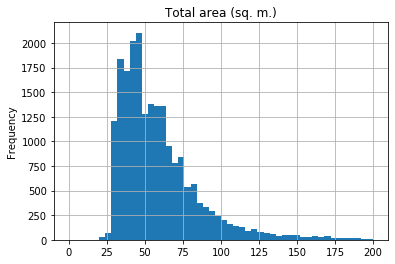

In [46]:
df['total_area'].plot(kind='hist', bins=50, range=(0, 200), grid=True, title='Total area (sq. m.)')

Ясно, что основная часть квартир имеет площадь примерно между 27 и 80 кв.м.. 

It is clear that the bulk of the apartments have an area between approximately 27 and 80 sq.m.

Посмотрим на цены.

Let's look at prices.

In [24]:
print('Минимальная цена:', df['last_price'].min())
print('Максимальная цена:', df['last_price'].max())

Минимальная цена: 12190
Максимальная цена: 420000000


Minimum price: 12190

Maximum price: 420000000

Квартира за 420 млн. р.? - Верю (наверно мелькала в расследовании Навального).
Квартира за 12190? - Не верю, но проверю!

An apartment for 420 million rubles? - I believe (probably flashed in Navalny's investigation).
Apartment for 12190? - I do not believe, but I will check!

In [25]:
df[df['last_price'] < 400000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_metr,day,month,year,ratio_living/total,ratio_kithcen/total,floor_position
7797,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,0,0,8.0,111.83,20,3,2019,0.29,0.37,последний


Наверно, просто забыли три нуля. Однако, гадать нам не нужно: оно всего одно - просто удалим.

Probably just forgot three zeros. However, we do not need to guess: it is only one - just delete it.

In [26]:
df.drop(df[df['last_price'] < 400000].index, axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)

Построим гистограмму. 

Let's build a histogram.

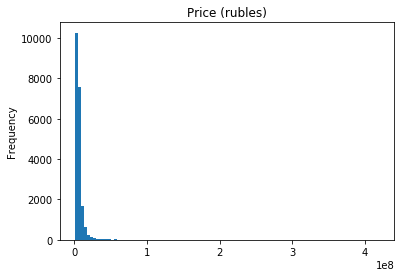

In [47]:
df['last_price'].plot(kind='hist', bins=100, title='Price (rubles)')

Из-за сликшом большого размаха, сколько корзин не выбирай, гистограмма получается не информативной. Разобъем наблюдения по децилям цен.

Due to too large scope, no matter how many baskets you choose, the histogram is not informative. Breakdown of observation by price deciles.

In [48]:
df['price_quartilis'] = pd.qcut(df['last_price'] ,q=10)
print(df.groupby('price_quartilis')['locality_name'].count())

price_quartilis
(429999.999, 2600000.0]      2193
(2600000.0, 3250000.0]       2075
(3250000.0, 3700000.0]       2094
(3700000.0, 4200000.0]       2252
(4200000.0, 4700000.0]       2012
(4700000.0, 5300000.0]       2007
(5300000.0, 6200000.0]       2108
(6200000.0, 7585000.0]       2013
(7585000.0, 10847400.0]      2093
(10847400.0, 420000000.0]    2095
Name: locality_name, dtype: int64


Ого, как сбалансированно! А не посмотреть ли на гистограммы внутри децилий?

Wow, how balanced! Why not look at the histograms inside the deciles?

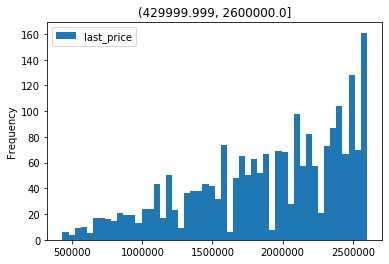

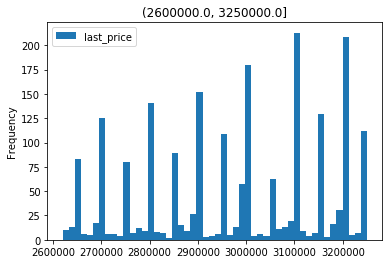

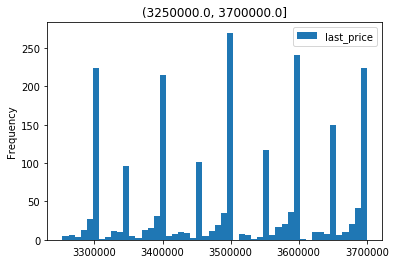

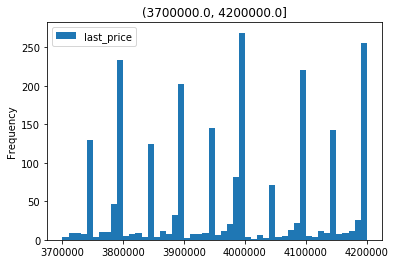

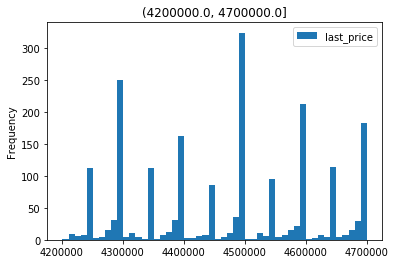

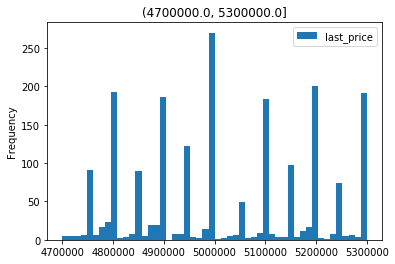

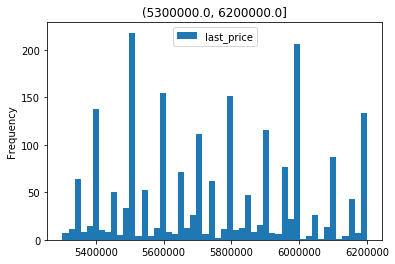

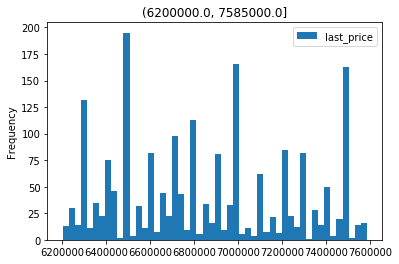

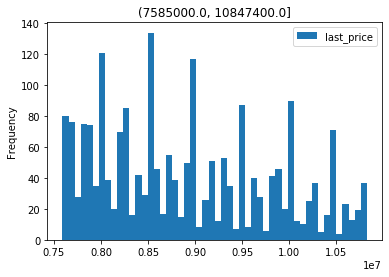

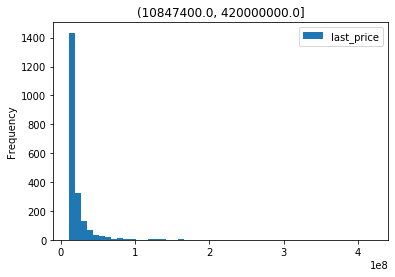

In [49]:
for name, grouped_price in df.groupby('price_quartilis'):
        grouped_price.plot(y='last_price', kind='hist', bins=50, title=name)

Можно увидеть, что цены "сбиваются в кучку" рядом с наиболее "круглыми" значениями (оно и понятно, квартиры же продаём). Также внутри каждого графика видим похожие друг на друга пики (не считая самого дешевого и самого дорогого сегмента).

You can see that the prices "knock up" next to the most "round" values (it's understandable, we are selling apartments). Also inside each chart we see peaks similar to each other (not counting the cheapest and most expensive segment).

Посмотрим на количество комнат.

Let's look at the number of rooms.

In [50]:
print('Минимальное количество комнат:', df['rooms'].min())
print('Максимальное количество комнат:', df['rooms'].max())

Минимальное количество комнат: 1
Максимальное количество комнат: 19


Minimum number of rooms: 1
Maximum number of rooms: 19

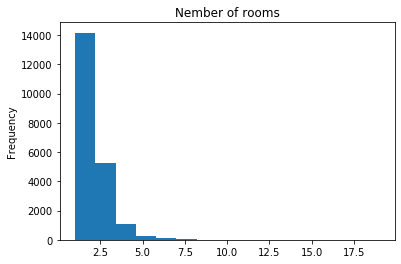

In [74]:
df['rooms'].plot(kind='hist', bins=15, title='Nember of rooms')

Естественно, что квартир с 3+ комант довольно мало. Наверно, самый главый вывод, который можно сделать: пользователи добросовестно заполняют эту графу.

Naturally, there are quite a few apartments with 3+ rooms. Probably the most important conclusion that can be drawn is that users fill out this column in good faith.

Посмотрим на квартиры, где 10 и больше комнат: вдруг что-то странное.

Let's look at apartments with 10 or more rooms: suddenly something strange.

In [52]:
df[df['rooms'] >= 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_for_metr,day,month,year,ratio_living/total,ratio_kithcen/total,floor_position,price_quartilis
585,3,17500000,183.7,2018-07-01,11,3.40,7,138.8,7,False,...,0,NaN,95264.02,1,7,2018,0.76,0.07,последний,"(10847400.0, 420000000.0]"
782,5,25000000,363.0,2017-12-23,14,3.16,5,222.0,4,False,...,435,418.0,68870.52,23,12,2017,0.61,0.05,другой,"(10847400.0, 420000000.0]"
3680,6,23000000,272.6,2018-01-11,10,3.14,7,145.9,7,False,...,531,NaN,84372.71,11,1,2018,0.54,0.07,последний,"(10847400.0, 420000000.0]"
4730,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,False,...,0,14.0,110169.49,14,2,2019,0.69,0.17,другой,"(10847400.0, 420000000.0]"
8599,8,33000000,194.1,2017-02-07,11,3.43,5,129.0,2,False,...,66,813.0,170015.46,7,2,2017,0.66,0.06,другой,"(10847400.0, 420000000.0]"
12850,6,32250000,374.6,2018-06-09,19,2.65,5,264.5,2,False,...,548,114.0,86091.83,9,6,2018,0.71,0.07,другой,"(10847400.0, 420000000.0]"
16036,4,15500000,216.1,2016-07-04,10,3.15,5,161.4,2,False,...,0,11.0,71726.05,4,7,2016,0.75,0.09,другой,"(10847400.0, 420000000.0]"
16670,6,28500000,270.0,2015-03-02,16,3.00,4,180.0,4,False,...,0,1365.0,105555.56,2,3,2015,0.67,0.05,последний,"(10847400.0, 420000000.0]"
16710,11,40000000,290.0,2016-06-21,10,3.50,6,189.4,6,False,...,227,77.0,137931.03,21,6,2016,0.65,0.10,последний,"(10847400.0, 420000000.0]"
17278,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,318,106.0,466666.67,6,12,2017,0.46,0.12,последний,"(10847400.0, 420000000.0]"


Всё в порядке. Идём дальше.

It's all right. Move on.

Взглянем на потолки.

Let's take a look at the ceilings.

In [53]:
print('Минимальная высота потолка', df['ceiling_height'].min())
print('Максимальная высота потолка', df['ceiling_height'].max())

Минимальная высота потолка 1.0
Максимальная высота потолка 100.0


Minimum ceiling height: 1.0

Maximum ceiling height: 100.0

Ну это ни в какие ворота.Проверим слишком болшие и слишком маленькие значения.

Well, this is no way. Let's check the values that are too large and too small.

In [54]:
df[(df['ceiling_height'] > 6) | (df['ceiling_height'] < 2)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_for_metr,day,month,year,ratio_living/total,ratio_kithcen/total,floor_position,price_quartilis
2788,14,2900000,75.0,2018-11-12,3,32.00,3,53.0,2,False,...,0,NaN,38666.67,12,11,2018,0.71,0.11,другой,"(2600000.0, 3250000.0]"
3081,3,1400000,30.0,2018-03-16,1,8.00,5,15.3,2,False,...,0,125.0,46666.67,16,3,2018,0.51,0.24,другой,"(429999.999, 2600000.0]"
4112,0,4300000,45.0,2018-02-01,2,25.00,9,30.0,2,False,...,331,181.0,95555.56,1,2,2018,0.67,0.16,другой,"(4200000.0, 4700000.0]"
4483,0,3850000,30.5,2018-10-03,1,24.00,5,19.5,1,True,...,578,7.0,126229.51,3,10,2018,0.64,0.18,первый,"(3700000.0, 4200000.0]"
4638,0,2500000,54.0,2017-10-13,2,27.00,5,30.0,3,False,...,0,540.0,46296.30,13,10,2017,0.56,0.17,другой,"(429999.999, 2600000.0]"
5008,4,4400000,50.0,2017-08-08,2,26.00,9,21.3,3,False,...,0,267.0,88000.00,8,8,2017,0.43,0.14,другой,"(4200000.0, 4700000.0]"
5046,5,1500000,42.8,2017-08-14,2,1.20,2,27.5,1,False,...,0,248.0,35046.73,14,8,2017,0.64,0.12,первый,"(429999.999, 2600000.0]"
5131,17,8150000,80.0,2019-01-09,2,27.00,36,41.0,13,False,...,80,38.0,101875.00,9,1,2019,0.51,0.15,другой,"(7585000.0, 10847400.0]"
5180,20,5650000,45.0,2018-08-15,1,8.30,16,19.3,14,False,...,613,14.0,125555.56,15,8,2018,0.43,0.18,другой,"(5300000.0, 6200000.0]"
5522,6,3300000,44.4,2019-03-25,2,25.00,5,31.3,5,False,...,73,NaN,74324.32,25,3,2019,0.70,0.13,последний,"(3250000.0, 3700000.0]"


В потолки меньше 2 метров или больше 6 я не верю, а таких наблюдений всего 20. Удаляем.

I don’t believe in ceilings less than 2 meters or more than 6, but there are only 20 such observations. We delete it.

In [55]:
df.drop(df[(df['ceiling_height'] > 6) | (df['ceiling_height'] < 2)].index, axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)

Теперь можно ожидать хорошей гистограммы.

Now we can expect a good histogram.

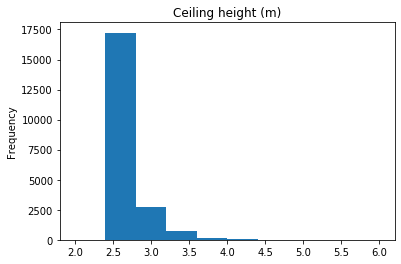

In [77]:
df['ceiling_height'].plot(kind='hist', bins=10, title='Ceiling height (m)')

Отлично получилось! Как и полагается, большинство квартир имеют потолки высотой от 2,4 до 3,2 метров.

It worked out great! As expected, most apartments have ceilings from 2.4 to 3.2 meters high.

<a id='Step_6'></a>
#### Пункт B.

#### Point B.


Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

We will study the time of sale of the apartment. Let's build a histogram. Let's calculate the mean and median. Let's describe how much a sale usually takes. When can sales be considered very fast, and when unusually long?

Посмотрим на основные показатели времени до снятия.

Let's look at the main indicators of the time before withdrawal.

In [57]:
print('Минимальное время до снятия', df['days_exposition'].min())
print('Максимальное время до снятия', df['days_exposition'].max())
print('Среднее время до снятия', df['days_exposition'].mean())
print('Медианное время до снятия', df['days_exposition'].median())

Минимальное время до снятия 1.0
Максимальное время до снятия 1580.0
Среднее время до снятия 185.56610470275066
Медианное время до снятия 102.0


Минимальное время до снятия 1.0
Максимальное время до снятия 1580.0
Среднее время до снятия 185.56610470275066
Медианное время до снятия 102.0

Посмотрим график. 

Let's see the chart.

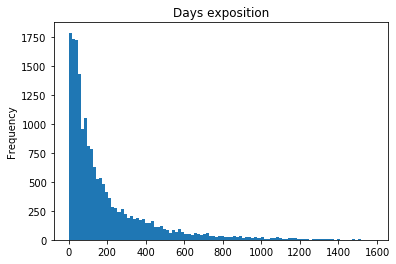

In [78]:
df['days_exposition'].plot(kind='hist', bins=100, title='Days exposition')

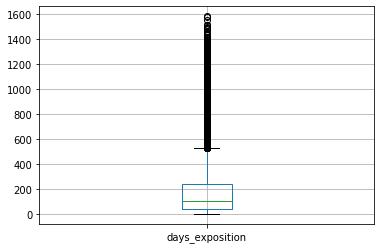

In [83]:
df.boxplot('days_exposition')

Видим, что значения больше 550 - это выбросы - будем считать слишком большим значением. Значения до 7 дней будем считать слишком маленькми: скорее всего клиент просто передумал размещать объявление.

We see that values ​​greater than 550 are outliers - we will consider it too large a value. We will consider values up to 7 days to be too small: most likely, the client simply changed his mind about placing an ad.

После отсекания слишком больших и слишком маленьких значений, получим актуальное описание времени до снятия.

After cutting off too large and too small values, we get an actual description of the time before removal.

In [60]:
print('Минимальное время до снятия', df[(df['days_exposition'] > 7) & (df['days_exposition'] < 550)]['days_exposition'].min())
print('Максимальное время до снятия', df[(df['days_exposition'] > 7) & (df['days_exposition'] < 550)]['days_exposition'].max())
print('Среднее время до снятия', df[(df['days_exposition'] > 7) & (df['days_exposition'] < 550)]['days_exposition'].mean())
print('Медианное время до снятия', df[(df['days_exposition'] > 7) & (df['days_exposition'] < 550)]['days_exposition'].median())

Минимальное время до снятия 8.0
Максимальное время до снятия 549.0
Среднее время до снятия 142.18580126796812
Медианное время до снятия 96.0


Minimum time to withdrawal 8.0

Maximum time before withdrawal 549.0

Average time to withdrawal 142.18580126796812

Median time to withdrawal 96.0

То есть чаще всего, квартира продается за 3 месяца. Данные о продаже менее чем за 7 дней и более чем за 550 дней мы исключили из выборки.

That is, most often, the apartment is sold for 3 months. Sales data less than 7 days and more than 550 days were excluded from the sample.

<a id='Step_7'></a>
#### Пункт C.

#### Point C.

Какие факторы больше всего влияют на стоимость квартиры? Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.

What factors most affect the value of an apartment? We will study whether the price depends on the area, number of rooms, distance from the center. We will study the dependence of the price on which floor the apartment is located on: first, last or another. We will also study the dependence on the placement date: day of the week, month and year.

Для этого нам понадобится матрица диаграмм рассеяния и корреляция.

To do this, we need a matrix of scatterplots and correlation.

Корреляции по всем факторам.

Correlations across all factors.

In [61]:
df.corr()['last_price'].abs().sort_values(ascending=False)

last_price             1.000000
price_for_metr         0.742706
total_area             0.691568
living_area            0.603435
kitchen_area           0.518290
rooms                  0.391182
ceiling_height         0.338635
cityCenters_nearest    0.253612
ponds_around3000       0.220609
parks_around3000       0.213762
airports_nearest       0.184327
parks_nearest          0.125106
total_images           0.114208
ponds_nearest          0.094750
ratio_kithcen/total    0.090309
days_exposition        0.088792
year                   0.042654
is_apartment           0.033782
floor                  0.031454
balcony                0.004398
ratio_living/total     0.003688
day                    0.003545
floors_total           0.000510
month                  0.000086
studio                      NaN
open_plan                   NaN
Name: last_price, dtype: float64

Ну что же... сильная корреляция цены наблюдается только с ценной за метр, хотя суммарную площадь можено тоже притянуть "за уши". Корреляции цены с ценой за метр, на сколько я понимаю, результат линейной зависимости (цену за метр мы получили из цены). Поэтому чемпионом я буду считать площадь. Больше площадь - дороже квартира. Это же подтверждают следующие за чемпионом показатели корреляции: желая площадь, площадь кухни, количество комнат, хотя в общем то сама общая площадь естсетсвенно объясняется своими состовляющими: жилая площадь, площадь кухни и плошадь всего остального (нет в таблице). Далее идет высота потолков - для меня факт не очевидный Может быть это за счет дорогих квартир? В более глубоком исследование стоило бы посотмреть на это в разрезе цен. Затем идут совершенно очевидные пункты: близость центра и количество парков и водоъемов в округе, хотя непосредсвтенная близость парков и водоъемов неважна. День недели, месяц и год никак не влияют на цену, то есть можно сказать, что цена на квартиры не подвержена сезонным колебаниям. 

Well ... a strong price correlation is observed only with the price per meter, although the total area can also be pulled "by the ears". Price correlation with the price per meter, as far as I understand, is the result of a linear relationship (we got the price per meter from the price). Therefore, I will consider the area as the champion. More area - more expensive apartment. This is also confirmed by the correlation indicators following the champion: wanting area, kitchen area, number of rooms, although in general the total area itself is naturally explained by its components: living area, kitchen area and the area of ​​\u200b\u200beverything else (not in the table). Next comes the height of the ceilings - a fact that is not obvious to me. Maybe this is due to expensive apartments? In a deeper study, it would be worth looking at this in terms of prices. Then there are absolutely obvious points: the proximity of the center and the number of parks and reservoirs in the district, although the immediate proximity of parks and reservoirs is not important. Day of the week, month and year do not affect the price in any way, that is, we can say that the price of apartments is not subject to seasonal fluctuations.

А теперь ответим на вопрос: как связана цена и этаж?

And now let's answer the question: how is price and floor related?

In [62]:
df.pivot_table(index='floor_position', values='last_price', aggfunc=['mean', 'median'])

,mean,median
,last_price,last_price
floor_position,,
другой,6.687274e+06,4900000
первый,4.850825e+06,3965198
последний,6.990083e+06,4350000


Покупатели не ценят первые этажи. А вот с последними этажами что-то странное: вроде как это не лучший вариант, но средняя цена вышла самая большой, хотя и не с большим отрывом. Тут что-то не так.

Buyers don't appreciate ground floors. But there is something strange with the last floors: it seems like this is not the best option, but the average price came out the highest, although not by a large margin. There's something wrong here.

Стало яснее. Похоже, что в жилье "для смертных" всё как пологается - первые и последние этажи дешевле остальных. А вот для дорогих квартир ситуация иная - там ценится последний этаж. Жилье будет качественным на любом этаже, а вот вид становится тем лучше, чем выше этаж. Да и ктому же, там может быть выход на крышу. Поэтому среднее становится некорректной основой для выводов о влиянии этажа на цену. Опять же, лучше смотреть на ситуацию и в разрезе цен, в том числе.

It became clearer. It seems that in housing "for mortals" everything is as it should be - the first and last floors are cheaper than the rest. But for expensive apartments the situation is different - the last floor is valued there. Housing will be of high quality on any floor, but the view gets better, the higher the floor. Yes, and whoever, there may be access to the roof. Therefore, the average becomes an incorrect basis for conclusions about the effect of the floor on the price. Again, it is better to look at the situation in terms of prices, including.

<a id='Step_8'></a>
#### Пункт D.

#### Point D.


Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья. 

Let's choose 10 settlements with the largest number of ads. Let's calculate the average price per square meter in these settlements. We single out among them the settlements with the highest and lowest cost of housing.

In [63]:
(df.pivot_table(index='locality_name', values='price_for_metr', aggfunc = ['count', 'mean'])
                               .sort_values(by=('count', 'price_for_metr'), ascending=False)
                                                                                  .head(10))

,count,mean
,price_for_metr,price_for_metr
locality_name,,
санкт-петербург,14054,113883.230554
посёлок мурино,401,85470.734040
посёлок шушары,393,78535.194122
всеволожск,357,69029.150056
пушкин,337,103291.299110
колпино,322,75226.296398
гатчина,290,68635.620586
посёлок парголово,288,90756.002986


In [64]:
(df.pivot_table(index='locality_name', values='price_for_metr', aggfunc = ['count', 'mean'])
                               .sort_values(by=('mean', 'price_for_metr'), ascending=False)
                                                                                  .head(10))

,count,mean
,price_for_metr,price_for_metr
locality_name,,
посёлок репино,2,127678.570000
санкт-петербург,14054,113883.230554
зеленогорск,23,113248.786087
деревня бор,1,105539.260000
пушкин,337,103291.299110
сестрорецк,166,101463.169036
кудрово,152,99960.444539
деревня мистолово,9,93294.498889


Самое дорогое и самое дешевое жильё из топ-10 по количеству объявлений - Санк-Петербург и Гатчина, соответсвенно.

The most expensive and cheapest housing from the top 10 in terms of the number of ads is St. Petersburg and Gatchina, respectively.

<a id='Step_9'></a>
#### Пункт E.

#### Point E.

Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге ('locality_name'). Наша задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

Let's study the offers of apartments: for each apartment there is information about the distance to the center. Select apartments in St. Petersburg ('locality_name'). Our task is to find out which area is included in the center. Let's create a column with the distance to the center in kilometers: round to integer values. After that, we calculate the average price for each kilometer. Let's build a graph: how the price depends on the distance from the center. Let's define the border where the graph changes a lot - this will be the central zone.

Построим столбец - километры от квартиры до центра.

Let's build a column - kilometers from the apartment to the center.

In [65]:
df['kilometer_to_center'] = round(df['cityCenters_nearest']/1000).astype('int64')

Построим график зависимости средней цены от близости к центру.

Let's build a graph of the dependence of the average price on the proximity to the center.

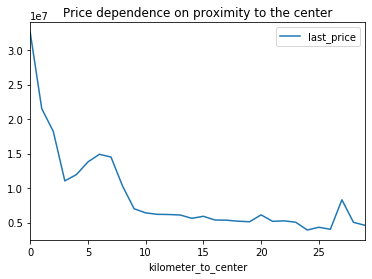

In [106]:
df[df['locality_name'] == 'санкт-петербург'].groupby('kilometer_to_center')['last_price'].mean().plot(
    title='Price dependence on proximity to the center', legend=True)

Похоже, что центр города - 4 км вокруг условной точки на карте.

It looks like the city center is 4 km around the symbolic point on the map.

<a id='Step_10'></a>
#### Пункт F.

#### Point F.

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы. Отличаются ли они от общих выводов по всему городу?

Let's select a segment of apartments in the center. Let's analyze this territory and study the following parameters: area, price, number of rooms, ceiling height. We also highlight the factors that affect the cost of an apartment (number of rooms, floor, distance from the center, date of placement of the announcement). Let's draw conclusions. Do they differ from the general findings throughout the city?

Создадим переменную df_centr, которая хранит в себе наблюдения квартир из области цента (мы опредилил эту область на предыдущем шаге - 9 км).

Let's create a variable df_centr, which stores the observations of apartments from the center area (we defined this area in the previous step - 9 km).

In [67]:
df_centr = df.query('kilometer_to_center <= 4')

Изучим площадь.

Let's study the area.

In [68]:
print('Минимальная площадь по всему городу:', df['total_area'].min())
print('Максимальная плошадь по всему городу:', df['total_area'].max())
print('Средняя площадь по всему городу:', df['total_area'].mean())
print('Медианная плошадь по всему городу:', df['total_area'].median())
print()
print('Минимальная площадь в центре:', df_centr['total_area'].min())
print('Максимальная плошадь в центре:', df_centr['total_area'].max())
print('Средняя площадь в центре:', df_centr['total_area'].mean())
print('Медианная плошадь в центре:', df_centr['total_area'].median())

Минимальная площадь по всему городу: 14.0
Максимальная плошадь по всему городу: 900.0
Средняя площадь по всему городу: 60.53916331994646
Медианная плошадь по всему городу: 52.2

Минимальная площадь в центре: 21.0
Максимальная плошадь в центре: 517.0
Средняя площадь в центре: 95.32302922309339
Медианная плошадь в центре: 83.0


Minimum area throughout the city: 14.0

Maximum area throughout the city: 900.0

Average area across the city: 60.53916331994646

Median area for the entire city: 52.2

Minimum area in the center: 21.0

Maximum area in the center: 517.0

Average area in the center: 95.32302922309339

Median area in the center: 83.0

В среднем квартиры в центре больше.

Изучим цены.

Let's look at the prices.

In [69]:

print('Минимальная цена по всему городу:', df['last_price'].min())
print('Максимальная цена по всему городу:', df['last_price'].max())
print('Средняя цена по всему городу:', df['last_price'].mean())
print('Медианная цена по всему городу:', df['last_price'].median())
print()
print('Минимальная цена в центре:', df_centr['last_price'].min())
print('Максимальная цена в центре:', df_centr['last_price'].max())
print('Средняя цена в центре:', df_centr['last_price'].mean())
print('Медианная цена в центре:', df_centr['last_price'].median())

Минимальная цена по всему городу: 430000
Максимальная цена по всему городу: 420000000
Средняя цена по всему городу: 6508811.723704341
Медианная цена по всему городу: 4700000.0

Минимальная цена в центре: 1600000
Максимальная цена в центре: 401300000
Средняя цена в центре: 14518498.091233073
Медианная цена в центре: 9500000.0


Minimum price throughout the city: 430000

Maximum price throughout the city: 420000000

Average price throughout the city: 6508811.723704341

Median price throughout the city: 4700000.0

Minimum price in the center: 1600000

Maximum price in the center: 401300000

Average price in the center: 14518498.091233073

Median price in the center: 9500000.0

Всё как полагается - квартиры в центре значительно дороже.

Everything is as it should be - apartments in the center are much more expensive.

Изучим высоту потолка.

Let's study the height of the ceiling.

In [70]:
print('Минимальная высота потолка по всему городу:', df['ceiling_height'].min())
print('Максимальная высота потолка по всему городу:', df['ceiling_height'].max())
print('Средняя высота потолка по всему городу:', df['ceiling_height'].mean())
print('Медианная высота потолка по всему городу:', df['ceiling_height'].median())
print()
print('Минимальная высота потолка в центре:', df_centr['ceiling_height'].min())
print('Максимальная высота потолка в центре:', df_centr['ceiling_height'].max())
print('Средняя высота потолка в центре:', df_centr['ceiling_height'].mean())
print('Медианная высота потолка в центре:', df_centr['ceiling_height'].median())

Минимальная высота потолка по всему городу: 2.0
Максимальная высота потолка по всему городу: 6.0
Средняя высота потолка по всему городу: 2.6971227768215713
Медианная высота потолка по всему городу: 2.65

Минимальная высота потолка в центре: 2.4
Максимальная высота потолка в центре: 4.9
Средняя высота потолка в центре: 3.0105416963649314
Медианная высота потолка в центре: 3.0


Потолки в центре немного выше: и в среднем и по минимуму. 

Изучим количество комнат.

In [71]:
print('Минимальное количество комнат по всему городу:', df['rooms'].min())
print('Максимальное количество комнат по всему городу:', df['rooms'].max())
print('Среднее количество комнат по всему городу:', df['rooms'].mean())
print('Медианное количество комнат по всему городу:', df['rooms'].median())
print()
print('Минимальное количество комнат в центре:', df_centr['rooms'].min())
print('Максимальное количество комнат в центре:', df_centr['rooms'].max())
print('Среднее количество комнат в центре:', df_centr['rooms'].mean())
print('Медианное количество комнат в центре:', df_centr['rooms'].median())

Минимальное количество комнат по всему городу: 1
Максимальное количество комнат по всему городу: 19
Среднее количество комнат по всему городу: 2.0956683878370623
Медианное количество комнат по всему городу: 2.0

Минимальное количество комнат в центре: 1
Максимальное количество комнат в центре: 19
Среднее количество комнат в центре: 3.059158945117605
Медианное количество комнат в центре: 3.0


Minimum number of rooms throughout the city:

Maximum number of rooms throughout the city:

Average number of rooms across the city:

Median number of rooms across the city:

Minimum number of rooms in the center:

Maximum number of rooms in the center:

Average number of rooms in the center:

Median number of rooms in the center:

В центре квартиры имеют больше комнат, чем по всему городу.

In the center of the apartment have more rooms than throughout the city.

Посмотрим что влияет на цену.

Let's see what affects the price.

In [72]:
corr_comp = (pd.DataFrame([df_centr.corr()['last_price'].abs().sort_values(ascending=False), 
                           df.corr()['last_price'].abs().sort_values(ascending=False)]).T)
corr_comp.columns = ['last_price_centr', 'last_price_whole_city']
corr_comp

,last_price_centr,last_price_whole_city
last_price,1.000000,1.000000
price_for_metr,0.842846,0.742706
total_area,0.566010,0.691568
living_area,0.486800,0.603435
kitchen_area,0.389246,0.518290
rooms,0.265566,0.391182
kilometer_to_center,0.179645,0.253729
cityCenters_nearest,0.171210,0.253612
total_images,0.141648,0.114208
parks_around3000,0.129945,0.213762


In [73]:
df_centr.pivot_table(index='floor_position', values='last_price', aggfunc=['mean', 'median'])

,mean,median
,last_price,last_price
floor_position,,
другой,1.527408e+07,9980000
первый,9.336884e+06,6975000
последний,1.534285e+07,9455000


Факторы влияющие на цену для квартир в центре и для квартир по всему городу одни и теже, за некоторыми исключениями:
- в центре меньше внимания обращают на потолок;
- в центре меньше внимания обращают на расстояние до условного центра и на количество прудов и водоемов.

The factors affecting the price for apartments in the center and for apartments throughout the city are the same, with some exceptions:
- in the center pay less attention to the ceiling;
- in the center, less attention is paid to the distance to the conditional center and the number of ponds and reservoirs.

<a id='Step_11'></a>
### Шаг 5. Общий вывод

### Step 5. General conclusion

Мы подготовили данные:
We have prepared the data:

- обработали пропуски и дубликаты;
- подобрали подходящие типы для переменных;
- удалили подозрительные наблюдения.



- processed omissions and duplicates;
- selected suitable types for variables;
- removed suspicious observations.

Так же обнаружили, что в данных есть странные значения, например, слишком низкая цена или слишком низкие или высокие потолки.

We also found that there are strange values in the data, for example, a price that is too low or ceilings that are too low or high.

Мы провели небольшое исследование и получили:

We did a little research and got:

 - стоимость квадратного метра от 9615 и до 1736842 рублей;
 - площадь от 14 и до 900 квадратных метров;
 - максимальное количество комнат - 19;
 - квартира на первом этаже в среднем на 18,5% дешевле чем на остальных этажах;
 - чаще всего квартиры продаются за 3 месяца.

- cost per square meter from 9615 to 1736842 rubles;
- area from 14 to 900 square meters;
- maximum number of rooms - 19;
- an apartment on the ground floor is on average 18.5% cheaper than on the other floors;
- most often apartments are sold for 3 months.

И думаем, что:

And we think that:

- В целом на цену квартиры влияют: площадь, место, этаж, количество парков и водоемов, количество комнат и высота потолков.
- В центре цены, площади и потолки больше. А влияние места, высоты потолка и парков и водоемов вокруг снижается.
- Последний этаж может быть дороже для дорогих квартир из-за вида и возможного доступа к крыше.
- Центр города - это радиус 4 км от условного центра.

- In general, the price of an apartment is affected by: area, location, floor, number of parks and ponds, number of rooms and ceiling height.
- In the center of the price, area and ceilings more. And the influence of the place, the height of the ceiling and the parks and reservoirs around is reduced.
- The top floor can be more expensive for expensive apartments due to the view and possible access to the roof.
- The city center is a radius of 4 km from the conditional center.